# CIn UFPE - IF699 2020.3

Grupo:

- Adilson Angelo (aasj2)
- Ayrton Lira (abl2)
- Gabriel Barbosa (gbgv)

In [65]:
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
columns = ['age',
           'workclass',
           'fnlwgt',
           'education',
           'education-num',
           'marital-status',
           'occupation',
           'relationship',
           'race',
           'sex',
           'capital-gain',
           'capital-loss',
           'hours-per-week',
           'native-country',
           'year-income']

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GabrielBarbosaGV/ml-2020-3-project/pt2/parte2/data/adult.data', header=None)
df_test = pd.read_csv('https://raw.githubusercontent.com/GabrielBarbosaGV/ml-2020-3-project/pt2/parte2/data/adult.test', header=None)

In [4]:
df.columns = columns
df_test.columns = columns

## Business Understanding

[Census Income](https://archive.ics.uci.edu/ml/datasets/census+income)

Dados de um censo de 1994 para correlacionar a renda anual de um indivíduo com diversos fatores condicionais de seu ambiente

> "Extraction was done by Barry Becker from the 1994 Census database"

> "Prediction task is to determine whether a person makes over 50K a year."

## Data Understanding

- O conjunto de treinamento possui 32561 instâncias e 15 atributos, sendo 1 deles atributo de classe (year-income)
- O conjunto de teste possui metade do número de instâncias do conjunto de treinamento


In [5]:
print(df.shape)
print(df_test.shape)

(32561, 15)
(16281, 15)


- Os atributos são multivariados, possuem booleanos, discretos, categóricos, etc

**age** -> discreto: idade do individuo

**workclass** -> categorico: tipo de trabalho do individuo

**fnlwgt** -> discreto: numero de pessoas no total que o censo acredita que esse individuo representa

**education** -> categorico: nivel de educacao do individuo

**education-num** -> discreto: nivel de educacao do individuo em valor numerico

**marital-status** -> categorico: status matrimonial do individuo

**occupation** -> categorico: cargo que o individuo exerce

**relationship** -> categorico: tipo de relacionamento familiar que o individuo esta submetido

**race** -> categorico: etnia

**sex** -> booleano: genero binario do individuo

**capital-gain** -> continuo: lucro obtido

**capital-loss** -> continuo: prejuizo obtido

**hours-per-week** -> continuo: horas de trabalho/semana

**native-country** -> categorico: nacionalidade

**year-income** -> booleano: renda anual do individuo

## Prepare Data

"education" e "education-num" representam a mesma coisa, o nível de educação do indivíduo, sendo que education é um dado categórico e não expressa gradação desses níveis. Optamos assim, por tirar a coluna "education" e deixar somente "education-num"

In [6]:
df[['education', 'education-num']].value_counts()

education     education-num
HS-grad       9                10501
Some-college  10                7291
Bachelors     13                5355
Masters       14                1723
Assoc-voc     11                1382
11th          7                 1175
Assoc-acdm    12                1067
10th          6                  933
7th-8th       4                  646
Prof-school   15                 576
9th           5                  514
12th          8                  433
Doctorate     16                 413
5th-6th       3                  333
1st-4th       2                  168
Preschool     1                   51
dtype: int64

In [7]:
df.drop(columns=['education'], inplace=True)

Como pode ser observado abaixo, os dados categóricos "sex" e "year-income" são booleanos por terem um domínio composto de apenas 2 valores possíveis. Eles serão os únicos atributos categóricos a não ser codificados com o One-Hot-Encoding

In [8]:
df['year-income'].value_counts()

<=50K    24720
>50K      7841
Name: year-income, dtype: int64

> as classes são desbalanceadas

In [9]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [10]:
df['>50k'] = df['year-income'].apply(lambda x: 0 if x == '<=50K' else 1)
df.drop(columns=['year-income'], inplace=True)
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)

In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
>50k               int64
dtype: object

> Dada a natureza dos valores vazios no dataset (trabalho e nacionalidade), não acreditamos ser viável uma imputação. No one-hot-encoding esses valores ficarão apenas vazios

<AxesSubplot:>

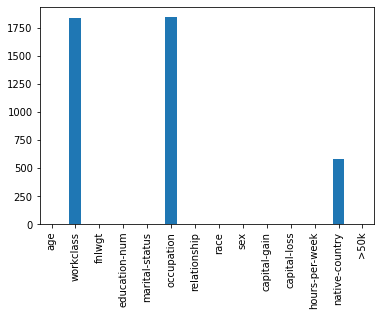

In [12]:
df.isna().sum().plot.bar()

#### One-Hot-Encoding

In [13]:
one_hot_df = pd.get_dummies(df)

one_hot_df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,>50k,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model data

Com os dados prontos e limpos, vamos dar início à escolha dos melhores hiperparâmetros

- Grid-Search + K-Fold estratificado em cada algoritmo no conjunto de treinamento para encontrar os melhores hiperparâmetros

- Pegar os melhores modelos (algoritmo + hiperparâmetros) e executar novamente o KFold

- Obter os resultados e métricas da execução com melhores modelos e plotar gráficos

In [49]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score

Deve-se normalizar as colunas numéricas para o KNN

In [15]:
norm = one_hot_df - one_hot_df.min() / (one_hot_df.max() - one_hot_df.min())

In [16]:
CV_kwargs = {
    'scoring': ['accuracy', 'roc_auc_ovr_weighted',
                'precision_weighted', 'recall_weighted', 'f1_weighted'],
    'refit': 'f1_weighted',
    'cv': 10,
    'n_jobs': 8
}

### KNN

Para o KNN, optamos por colocar uma maior variedade de numero de vizinhos `[1, 25]` e checar todos os tipos de pesos possíveis para cada vizinho (uniforme ou baseado na distância).

In [17]:
X_train = norm.drop(columns=['>50k'])
y_train = norm['>50k']

In [18]:
knn_args = {
    'n_neighbors': [i for i in range(26)],
    'weights': ('uniform', 'distance'),
    'n_jobs': [-1]
}

knn = GridSearchCV(KNeighborsClassifier(), knn_args, **CV_kwargs)

In [19]:
%%time
knn.fit(X_train, y_train)

CPU times: user 812 ms, sys: 133 ms, total: 946 ms
Wall time: 15.4 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid={'n_jobs': [-1], 'n_neighbors': (3, 5, 10),
                         'weights': ('uniform', 'distance')},
             refit='f1_weighted',
             scoring=['accuracy', 'roc_auc_ovr_weighted', 'precision_weighted',
                      'recall_weighted', 'f1_weighted'])

In [20]:
knn.best_params_

{'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}

### Decision Tree

Na árvore de decisão, escolhemos entre gini e entropia como fator de decisão do melhor atributo em cada split; variamos o número mínimo de instâncias para split no intervalo `[2, 10]`, assim como o número mínimo de instâncias por nó folha entre `[1, 10]`; para a quantidade de atributos a serem analisados para o split utilizamos todas as opções possíveis `{None, sqrt, log2}` que são o número total de atributos, a raíz quadrada, o log desse número respectivamente; quanto ao hiperparâmetro "class_weight" deixamos como "balanced" por termos um desbalanceamento na nossa base de treino e esse parâmetro leva isso em conta

In [21]:
X_train = one_hot_df.drop(columns=['>50k'])
y_train = one_hot_df['>50k']

In [22]:
tree_args = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [i for i in range(2, 11)],
    'min_samples_leaf': [i for i in range(1, 11)],
    'max_features': ['sqrt', 'log2'],
#     'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced'],
    'random_state': [42]
}

tree = GridSearchCV(DecisionTreeClassifier(), tree_args, **CV_kwargs)

In [23]:
%%time
tree.fit(X_train, y_train)

CPU times: user 12.6 s, sys: 1.5 s, total: 14.1 s
Wall time: 1min 18s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]},
             refit='f1_weighted',
             scoring=['accuracy', 'roc_auc_ovr_weighted', 'precision_weighted',
                      'recall_weighted', 'f1_weighted'])

In [24]:
tree.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

### Random Forest

Para random forest repetimos a mesma linha de pensamento que na árvore de decisão

In [25]:
X_train = one_hot_df.drop(columns=['>50k'])
y_train = one_hot_df['>50k']

In [26]:
forest_args = {
    'criterion': ['gini'],
#     'criterion': ['gini', 'entropy'],
    'min_samples_split': [i for i in range(2, 11)],
    'min_samples_leaf': [i for i in range(1, 11)],
    'max_features': ['log2'],
#     'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced'],
    'n_jobs': [CV_kwargs['n_jobs']],
    'random_state': [42]
}

forest = GridSearchCV(RandomForestClassifier(), forest_args, **CV_kwargs)

In [27]:
%%time
forest.fit(X_train, y_train)

CPU times: user 8.71 s, sys: 401 ms, total: 9.11 s
Wall time: 7min 29s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'class_weight': ['balanced'], 'criterion': ['gini'],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_jobs': [8], 'random_state': [42]},
             refit='f1_weighted',
             scoring=['accuracy', 'roc_auc_ovr_weighted', 'precision_weighted',
                      'recall_weighted', 'f1_weighted'])

In [28]:
forest.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_jobs': 8,
 'random_state': 42}

### MLP

Para a MLP, optamos por não ultrapassar 2 camadas ocultas, cada uma no intervalo de `[50, 250]` neurônios (com step de 50); as funções de ativação testadas foram a logística e a tangente hiperbolica, as outras funções não pareceram interessantes de se testar (identidade e linear retificada); a taxa de aprendizado `alpha` variou em potências de 10 no intervalo `[-1, -4]`

In [29]:
X_train = one_hot_df.drop(columns=['>50k'])
y_train = one_hot_df['>50k']

In [81]:
n_layers = [1, 2]
n_neurons = [i for i in range(50, 251, 50)]

layers = [tuple([n for i in range(l)]) for l in n_layers for n in n_neurons]

In [30]:
mlp_args = {
    'hidden_layer_sizes': [(i,) for i in range(50, 251, 50)],
#     'hidden_layer_sizes': layers,
    'activation': ['logistic', 'tanh'],
    'alpha': [10 ** -4],
#     'alpha': [10 ** -i for i in range(1, 5)],
#     'max_iter': [10000],
    'random_state': [42]
}

mlp = GridSearchCV(MLPClassifier(), mlp_args, **CV_kwargs)

In [31]:
%%time
mlp.fit(X_train, y_train)

CPU times: user 52 s, sys: 54.4 s, total: 1min 46s
Wall time: 2min 15s


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=8,
             param_grid={'activation': ['logistic', 'tanh'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(50,), (100,), (150,), (200,),
                                                (250,)],
                         'random_state': [42]},
             refit='f1_weighted',
             scoring=['accuracy', 'roc_auc_ovr_weighted', 'precision_weighted',
                      'recall_weighted', 'f1_weighted'])

In [32]:
mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (250,),
 'random_state': 42}

### Ensemble

No comitê, foram testados os melhores modelos acima com 4 combinações possíveis dos hiperparâmetros `voting` e `weights`. Os pesos foram definidos como a pontuação (f1) que cada modelo obteve na validação

In [48]:
X = norm.drop(columns=['>50k'])
y = norm['>50k']

In [71]:
algos = {'knn': knn, 'decision_tree': tree, 'random_forest': forest, 'mlp': mlp}
estimators = [(k, v.best_estimator_) for k, v in algos.items()]
weights = [v.best_score_ for k, v in algos.items()]

ensemble_args1 = {
    'voting': 'soft',
    'weights': weights,
}

ensemble_args2 = {
    'voting': 'soft',
    'weights': None
}

ensemble_args3 = {
    'voting': 'hard',
    'weights': weights,
}

ensemble_args4 = {
    'voting': 'hard',
    'weights': None
}

common_args = {
    'flatten_transform': False,
    'n_jobs': -1
}

e1 = VotingClassifier(estimators, **ensemble_args1, **common_args)
e2 = VotingClassifier(estimators, **ensemble_args2, **common_args)
e3 = VotingClassifier(estimators, **ensemble_args3, **common_args)
e4 = VotingClassifier(estimators, **ensemble_args4, **common_args)

In [77]:
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds)

avrgs = {
    'e1': 0,
    'e4': 0,
    'e3': 0,
    'e2': 0
}

for train_index, val_index in tqdm(list(skf.split(X, y))):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    e1.fit(X_train, y_train)
    e2.fit(X_train, y_train)
    e3.fit(X_train, y_train)
    e4.fit(X_train, y_train)
    
    avrgs['e1'] += f1_score(y_val, e1.predict(X_val))
    avrgs['e2'] += f1_score(y_val, e2.predict(X_val))
    avrgs['e3'] += f1_score(y_val, e3.predict(X_val))
    avrgs['e4'] += f1_score(y_val, e4.predict(X_val))

avrgs = { k: v/n_folds for k, v in avrgs.items() }

print(f'E1: {avrgs["e1"]:.4f}')
print(f'E2: {avrgs["e2"]:.4f}')
print(f'E3: {avrgs["e3"]:.4f}')
print(f'E4: {avrgs["e4"]:.4f}')


E1: 0.6291
E2: 0.6195
E3: 0.6583
E4: 0.4061


In [78]:
ens = max([(e1, avrgs['e1']), (e2, avrgs['e2']), (e3, avrgs['e3']), (e4, avrgs['e4'])], key=lambda x: x[1])

In [79]:
ens

(VotingClassifier(estimators=[('knn',
                               KNeighborsClassifier(n_jobs=-1, n_neighbors=10,
                                                    weights='distance')),
                              ('decision_tree',
                               DecisionTreeClassifier(class_weight='balanced',
                                                      criterion='entropy',
                                                      max_features='sqrt',
                                                      random_state=42)),
                              ('random_forest',
                               RandomForestClassifier(class_weight='balanced',
                                                      max_features='log2',
                                                      min_samples_split=10,
                                                      n_jobs=8,
                                                      random_state=42)),
                              ('mlp',
      

## Results

In [ ]:
X = norm.drop(columns=['>50k'])
y = norm['>50k']

res = {
    'knn': {
        'est': knn
    },
    'tree': {
        'est': tree
    },
    'forest': {
        'est': forest
    },
    'mlp': {
        'est': mlp
    },
    'ens': {
        'est': ens
    }
}

n_folds = 10
skf = StratifiedKFold(n_splits=n_folds)

for train_index, val_index in tqdm(list(skf.split(X, y))):
    